# Problem Statement: The data contains the Selling Prices of different houses bases on different characteristics/attributes like area,no.of rooms,no.of bathrooms,etc

# At times, the property dealers appreciate the prices bases on the demand and hence there is rise in prices in real estates.so, in order to cope with this problems so that it is beneficial for the customers, we must have a model in place which should tell us the ideal prices of the house based on its characteristics.

# The objective of the study is to predict the ideal prices of the houses based on their characteristics using Regression algorithms.


# Author : M.A.Azam

In [1]:
#Importing basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
#Importing data
Housing_Prices=pd.read_csv('1. Regression - Module - (Housing Prices).csv')
Housing_Prices.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14-Oct-17,221900.0,3,1.00,1180.0,5650.0,1.0,No,None,...,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14-Dec-17,538000.0,3,2.25,2570.0,7242.0,2.0,No,None,...,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15-Feb-16,180000.0,2,1.00,770.0,10000.0,1.0,No,None,...,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14-Dec-17,604000.0,4,3.00,1960.0,5000.0,1.0,No,None,...,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15-Feb-16,510000.0,3,2.00,1680.0,8080.0,1.0,No,None,...,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503


In [3]:
Housing_Prices.shape #21613 rows and 21 columns

(21613, 21)

In [4]:
#eyeballing the data
Housing_Prices.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
Sale Price,21609.0,5.401984e+05,3.673890e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
No of Bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
No of Bathrooms,21609.0,2.114732e+00,7.701384e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
Flat Area (in Sqft),21604.0,2.079932e+03,9.184876e+02,2.900000e+02,1.429250e+03,1.910000e+03,2.550000e+03,1.354000e+04
Lot Area (in Sqft),21604.0,1.510776e+04,4.142827e+04,5.200000e+02,5.040000e+03,7.617500e+03,1.068825e+04,1.651359e+06
No of Floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
Overall Grade,21613.0,7.623467e+00,1.105439e+00,1.000000e+00,7.000000e+00,7.000000e+00,8.000000e+00,1.000000e+01
Area of the House from Basement (in Sqft),21610.0,1.788344e+03,8.279826e+02,2.900000e+02,1.190000e+03,1.560000e+03,2.210000e+03,9.410000e+03
Basement Area (in Sqft),21613.0,2.915090e+02,4.425750e+02,0.000000e+00,0.000000e+00,0.000000e+00,5.600000e+02,4.820000e+03


In [5]:
Housing_Prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21613 non-null  int64  
 1   Date House was Sold                        21613 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21613 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21604 non-null  float64
 6   Lot Area (in Sqft)                         21604 non-null  float64
 7   No of Floors                               21613 non-null  float64
 8   Waterfront View                            21613 non-null  object 
 9   No of Times Visited                        21613 non-null  object 
 10  Condition of the House

# EDA(Exploration of Data Analysis) and Pre-processing

## Data Exploration-Target/dependent(Sale Price) variable

In [6]:
Housing_Prices['Sale Price'].describe()
#here, mean>median  implies right(+ve) skewed symmetric- datapoints are more of lower values

count    2.160900e+04
mean     5.401984e+05
std      3.673890e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: Sale Price, dtype: float64

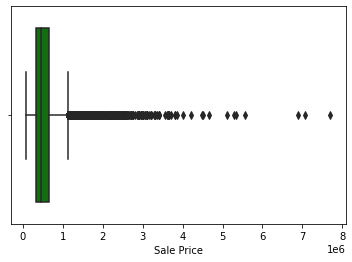

In [7]:
#outliers-visualizing,Identifying and Treating in sale price
#--visualizing by box and whiskers plot in sale price
import seaborn as sns
sns.boxplot(x=Housing_Prices['Sale Price'],color='green')

In [8]:
#--Identifying Outliers Mathematically
q1=Housing_Prices['Sale Price'].quantile(0.25)
q3=Housing_Prices['Sale Price'].quantile(0.75)
iqr=q3-q1
iqr#inter quartile range

323050.0

In [9]:
lowerlimit=q1-1.5*iqr
upperlimit=q3+1.5*iqr
(lowerlimit,upperlimit)

(-162625.0, 1129575.0)

In [10]:
#if lowerlimit<min, we take lowerlimit=min else lowerlimit=lowerlimit
#if upperlimit>max, we take upperlimit=max else upperlimit=upperlimit
#here lowerlimit<min,Therefore we take lowerlimit=min
#here upperlimit<max,so we take upperlimit=upperlimit
#final lower and upper limits are as follows
lower_limit=Housing_Prices['Sale Price'].min()
upper_limit=upperlimit
(lower_limit, upper_limit)
#the below is the range of outliers.
#if any values found to be outside this range is termed as Outliers

(75000.0, 1129575.0)

In [11]:
#Treating Outliers: methods:--deletion,--imputing,--Data Transformation,--binning
#here we take imputing method by limits to treat outliers in target variable
def limit_imputer(value):
    if value<lower_limit:
        return lower_limit
    if value>upper_limit:
        return upper_limit
    else:
        return value

In [12]:
Housing_Prices['Sale Price']=Housing_Prices['Sale Price'].apply(limit_imputer)

In [13]:
Housing_Prices['Sale Price'].describe()  #outliers has been treated as there is a change in max value

count    2.160900e+04
mean     5.116186e+05
std      2.500620e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      1.129575e+06
Name: Sale Price, dtype: float64

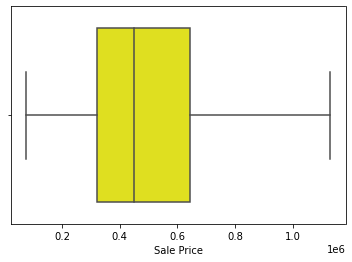

In [14]:
sns.boxplot(x=Housing_Prices['Sale Price'],color='yellow') #outliers has been treated.

In [15]:
#missing values- Identifing and treating in sale price
Housing_Prices['Sale Price'].isnull().sum()   #4 missing values in sale price

4

In [16]:
#--treating missing values: methods:--deletion, Imputing
#--we use deletion
Housing_Prices.dropna(inplace=True,axis=0,subset=['Sale Price'])

In [17]:
Housing_Prices['Sale Price'].isnull().sum() #no missing values, it has been treated by deletion

0

(array([ 501., 3379., 4513., 3911., 3069., 1977., 1432.,  877.,  531.,
        1419.]),
 array([  75000. ,  180457.5,  285915. ,  391372.5,  496830. ,  602287.5,
         707745. ,  813202.5,  918660. , 1024117.5, 1129575. ]),
 <a list of 10 Patch objects>)

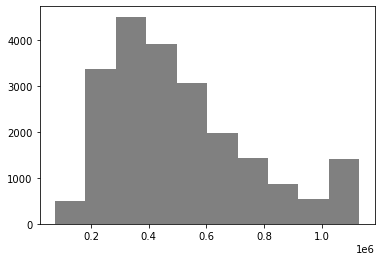

In [18]:
#distribution of target(sale price) variable
plt.hist(Housing_Prices['Sale Price'],bins=10,color='grey')
#here the distribution is right(+ve) skewed disribution,datapoints are more of lower values

## Data Exploration- Independent Numerical Variables

In [19]:
#missing values- Identifying and Treating
#missing values- deletion, imputing
#imputing-mean,median for continuous, mode for categorical
Housing_Prices.isnull().sum()

ID                                           0
Date House was Sold                          0
Sale Price                                   0
No of Bedrooms                               0
No of Bathrooms                              4
Flat Area (in Sqft)                          9
Lot Area (in Sqft)                           9
No of Floors                                 0
Waterfront View                              0
No of Times Visited                          0
Condition of the House                       0
Overall Grade                                0
Area of the House from Basement (in Sqft)    3
Basement Area (in Sqft)                      0
Age of House (in Years)                      0
Renovated Year                               0
Zipcode                                      1
Latitude                                     1
Longitude                                    1
Living Area after Renovation (in Sqft)       1
Lot Area after Renovation (in Sqft)          0
dtype: int64

In [20]:
#we take the missing values in a numerical_column and treat them simultaneously


numerical_column=['No of Bathrooms','Flat Area (in Sqft)','Lot Area (in Sqft)',
                 'Area of the House from Basement (in Sqft)','Latitude','Longitude',
                 'Living Area after Renovation (in Sqft)']

In [21]:
Housing_Prices[numerical_column].isnull().sum()

No of Bathrooms                              4
Flat Area (in Sqft)                          9
Lot Area (in Sqft)                           9
Area of the House from Basement (in Sqft)    3
Latitude                                     1
Longitude                                    1
Living Area after Renovation (in Sqft)       1
dtype: int64

In [22]:
#-- we will treat the missing values here by imputing w.r.to Median
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy='median')
Housing_Prices[numerical_column]=imputer.fit_transform(Housing_Prices[numerical_column])

In [23]:
Housing_Prices[numerical_column].isnull().sum()
#missing values has been treated in the numerical_column variable

No of Bathrooms                              0
Flat Area (in Sqft)                          0
Lot Area (in Sqft)                           0
Area of the House from Basement (in Sqft)    0
Latitude                                     0
Longitude                                    0
Living Area after Renovation (in Sqft)       0
dtype: int64

In [24]:
#now we've left with Zipcode with one missing value
## we take Zipcode as categorical variable and impute it  w.to mode(most_frequent)
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
Housing_Prices['Zipcode']=imputer.fit_transform(Housing_Prices['Zipcode'])
#here we getting valueerror, we will check the reason for it

ValueError: Expected 2D array, got 1D array instead:
array=[98178. 98125. 98028. ... 98144. 98027. 98144.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [25]:
Housing_Prices['Zipcode'].shape
#here the zipcode is in 1-d, we will convert in to 2-d

(21609,)

In [26]:
column=Housing_Prices['Zipcode'].values.reshape(-1,1)
column.shape
#we've converted in to 2-d with the instance column

(21609, 1)

In [27]:
#Now again Imputing w.to 'most_frequent' for Zipcode with the help of instance column
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
Housing_Prices['Zipcode']=imputer.fit_transform(column)

In [28]:
#verifying the missing values in Zipcode
Housing_Prices['Zipcode'].isnull().sum()
#missing values has been treated in Zipcode

0

In [29]:
#we transform Zipcode as type Object
Housing_Prices['Zipcode']=Housing_Prices['Zipcode'].astype(object)

In [30]:
Housing_Prices.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21609 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Date House was Sold                        21609 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21609 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21609 non-null  float64
 6   Lot Area (in Sqft)                         21609 non-null  float64
 7   No of Floors                               21609 non-null  float64
 8   Waterfront View                            21609 non-null  object 
 9   No of Times Visited                        21609 non-null  object 
 10  Condition of the House

In [31]:
#Variable Transformation
#we perform some of the possible variable transformation as per the data
#for variable-'No of Times Visited'

Housing_Prices['No of Times Visited'].unique()

array(['None', 'Thrice', 'Four', 'Twice', 'Once'], dtype=object)

In [32]:
#As Variable'No of Times Visited' has 5 levels, we convert them in to munerical values by mapping as below

mapping={'None':'0',
        'Once':'1',
        'Twice':'2',
        'Thrice':'3',
        'Four':'4'}
Housing_Prices['No of Times Visited']=Housing_Prices['No of Times Visited'].map(mapping)

In [33]:
Housing_Prices['No of Times Visited'].unique()
#'No of Times Visited' values has been transformed in to numerical values

array(['0', '3', '4', '2', '1'], dtype=object)

In [34]:
#Renovated Year Variable can be transformed(split in to ) two new variables-Ever Renovated and Years Since Renovation
#Ever Renovated-from Renovated Year if 0 means No,if done(with any year) means Yes
#Years Since Renovation-if Ever Renovated(with any number(year) except 0) then abs(purchase year)-renovated year
#purchase year- can be derived from year of'Date House was Sold'
#Renovated Year- EVER renovated,YearsSINCErenovation
Housing_Prices['Ever Renovated']=np.where(Housing_Prices['Renovated Year']==0,'No','Yes')
Housing_Prices['purchase year']=pd.DatetimeIndex(Housing_Prices['Date House was Sold']).year
Housing_Prices['years Since Renovation']=np.where(Housing_Prices['Ever Renovated']=='Yes',abs(Housing_Prices['purchase year'])-Housing_Prices['Renovated Year'],0)

In [35]:
#Now, we remove the columns ID,Date House was Sold and Renovated Year
Housing_Prices.drop(columns=['ID','Date House was Sold','Renovated Year'],inplace=True)

In [36]:
Housing_Prices.info()
#the new variables/columns with all variables are as follows

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21609 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Sale Price                                 21609 non-null  float64
 1   No of Bedrooms                             21609 non-null  int64  
 2   No of Bathrooms                            21609 non-null  float64
 3   Flat Area (in Sqft)                        21609 non-null  float64
 4   Lot Area (in Sqft)                         21609 non-null  float64
 5   No of Floors                               21609 non-null  float64
 6   Waterfront View                            21609 non-null  object 
 7   No of Times Visited                        21609 non-null  object 
 8   Condition of the House                     21609 non-null  object 
 9   Overall Grade                              21609 non-null  int64  
 10  Area of the House from

In [37]:
Housing_Prices['No of Times Visited']=Housing_Prices['No of Times Visited'].astype(int)

In [38]:
Housing_Prices.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21609 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Sale Price                                 21609 non-null  float64
 1   No of Bedrooms                             21609 non-null  int64  
 2   No of Bathrooms                            21609 non-null  float64
 3   Flat Area (in Sqft)                        21609 non-null  float64
 4   Lot Area (in Sqft)                         21609 non-null  float64
 5   No of Floors                               21609 non-null  float64
 6   Waterfront View                            21609 non-null  object 
 7   No of Times Visited                        21609 non-null  int32  
 8   Condition of the House                     21609 non-null  object 
 9   Overall Grade                              21609 non-null  int64  
 10  Area of the House from

## Data Exploration- Independent Categorical variables

In [39]:
# categorical variables-Waterfront View,Condition of the House,Zipcode,Ever Renovated
#Frequency distribution of unique values by value_counts()
Housing_Prices['Waterfront View'].value_counts()  #2 levels -no,yes

No     21446
Yes      163
Name: Waterfront View, dtype: int64

In [40]:
Housing_Prices['Condition of the House'].value_counts() #5 levels-Fair,Good,Excellent,Okay,Bad

Fair         14028
Good          5678
Excellent     1701
Okay           172
Bad             30
Name: Condition of the House, dtype: int64

In [41]:
Housing_Prices['Zipcode'].value_counts() #71 levels

98103.0    602
98038.0    590
98115.0    583
98052.0    574
98117.0    553
          ... 
98102.0    105
98010.0    100
98024.0     81
98148.0     57
98039.0     50
Name: Zipcode, Length: 70, dtype: int64

In [42]:
Housing_Prices['Ever Renovated'].value_counts() #2 levels -No and Yes

No     20695
Yes      914
Name: Ever Renovated, dtype: int64

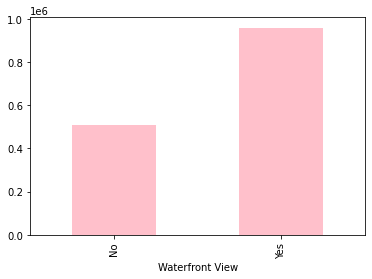

In [43]:
#Relationship with target variable-visualizing using bargraph
Housing_Prices.groupby('Waterfront View')['Sale Price'].mean().sort_values().plot(kind='bar',color='pink')

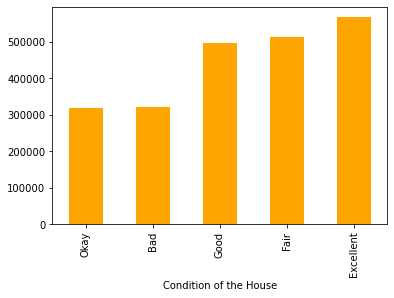

In [44]:
Housing_Prices.groupby('Condition of the House')['Sale Price'].mean().sort_values().plot(kind='bar',color='orange')

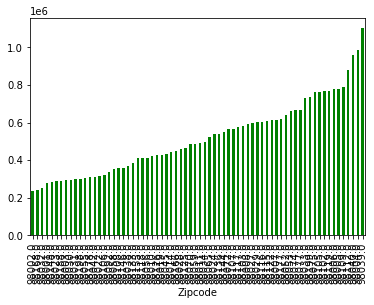

In [45]:
Housing_Prices.groupby('Zipcode')['Sale Price'].mean().sort_values().plot(kind='bar',color='green')

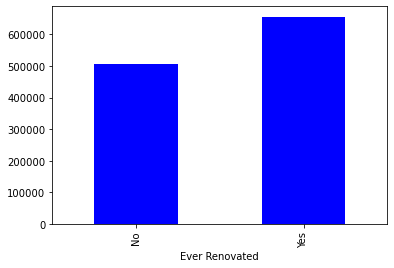

In [46]:
Housing_Prices.groupby('Ever Renovated')['Sale Price'].mean().sort_values().plot(kind='bar',color='blue')

In [47]:
#Transforming the features in to _ as should not have any features
Housing_Prices=Housing_Prices.rename(columns={'Sale Price':'Sale_Price'})
Housing_Prices=Housing_Prices.rename(columns={'Condition of the House':'Condition_of_the_House'})
Housing_Prices=Housing_Prices.rename(columns={'Ever Renovated':'Ever_Renovated'})
Housing_Prices=Housing_Prices.rename(columns={'Waterfront View':'Waterfront_View'})

In [48]:
#relationship with target variable mathematically, using Anova from the stats library
from statsmodels.formula.api import ols
import statsmodels.api as sm
mod=ols('Sale_Price~Condition_of_the_House',data=Housing_Prices).fit()
Anova_Table=sm.stats.anova_lm(mod,typ=2)
print(Anova_Table)
#F-a larger value and P<0.05
#there is a statistical significance differnce in means
#this varaible makes an impact on the target variable and should be included in our model

                              sum_sq       df         F        PR(>F)
Condition_of_the_House  1.441831e+13      4.0  58.25563  5.447605e-49
Residual                1.336752e+15  21604.0       NaN           NaN


In [49]:
mod=ols('Sale_Price~Ever_Renovated',data=Housing_Prices).fit()
Anova_Table=sm.stats.anova_lm(mod,typ=2)
print(Anova_Table)
#F-a larger value and P<0.05
#there is a statistical significance differnce in means
#this varaible makes an impact on the target variable and should be included in our model

                      sum_sq       df           F        PR(>F)
Ever_Renovated  1.998463e+13      1.0  324.378469  5.419055e-72
Residual        1.331185e+15  21607.0         NaN           NaN


In [50]:
mod=ols('Sale_Price~Waterfront_View',data=Housing_Prices).fit()
Anova_Table=sm.stats.anova_lm(mod,typ=2)
print(Anova_Table)
#F-a larger value and P<0.05
#there is a statistical significance differnce in means
#this varaible makes an impact on the target variable and should be included in our model

                       sum_sq       df           F         PR(>F)
Waterfront_View  3.283737e+13      1.0  538.192683  1.275558e-117
Residual         1.318333e+15  21607.0         NaN            NaN


In [51]:
mod=ols('Sale_Price~Zipcode',data=Housing_Prices).fit()
Anova_Table=sm.stats.anova_lm(mod,typ=2)
print(Anova_Table)
#F-a larger value and P<0.05
#there is a statistical significance differnce in means
#this varaible makes an impact on the target variable and should be included in our model

                sum_sq       df           F  PR(>F)
Zipcode   6.859657e+14     69.0  321.902033     0.0
Residual  6.652044e+14  21539.0         NaN     NaN


In [52]:
#Binning and Creation of Dummy Variables
#here we transform the categorical variables in numerical or boolean variables as regression requries all variables to numerical
#if n levels of categorical varaibles -> then (n-1) dummy variables are created[condition:levels<20]
#if n levels >20,then we bin in to fewer groups(n<20) and create the dummy variables out of it
#as per the problem:Condition_of_the_House,Ever_Renovated,Waterfront_View contains levels <20,and zipcode contains >20 levels
Housing_Prices=pd.get_dummies(Housing_Prices,columns=['Condition_of_the_House','Waterfront_View','Ever_Renovated'],drop_first=True)

In [53]:
#we can bin Zipcode with similar average Sale Price w.to groups
zip_table=Housing_Prices.groupby('Zipcode').agg({'Sale_Price':'mean'}).sort_values('Sale_Price',ascending=True)
zip_table.head()

,Sale_Price
Zipcode,
98002.0,234284.035176
98168.0,240328.371747
98032.0,251296.240000
98001.0,280804.690608
98148.0,284908.596491


In [54]:
zip_table['Zipcode_Group']=pd.cut(zip_table['Sale_Price'],bins=10,
                                 labels=['Zipcode_Group_0',
                                        'Zipcode_Group_1','Zipcode_Group_2',
                                        'Zipcode_Group_3','Zipcode_Group_4',
                                        'Zipcode_Group_5','Zipcode_Group_6',
                                        'Zipcode_Group_7','Zipcode_Group_8','Zipcode_Group_9'],include_lowest=True)

In [55]:
zip_table=zip_table.drop(columns='Sale_Price')
zip_table.head()

,Zipcode_Group
Zipcode,
98002.0,Zipcode_Group_0
98168.0,Zipcode_Group_0
98032.0,Zipcode_Group_0
98001.0,Zipcode_Group_0
98148.0,Zipcode_Group_0


In [56]:
Housing_Prices=pd.merge(Housing_Prices,zip_table,left_on='Zipcode',how='left',right_index=True)

In [57]:
Housing_Prices=Housing_Prices.drop(columns='Zipcode')
Housing_Prices.head()

,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,Lot Area after Renovation (in Sqft),purchase year,years Since Renovation,Condition_of_the_House_Excellent,Condition_of_the_House_Fair,Condition_of_the_House_Good,Condition_of_the_House_Okay,Waterfront_View_Yes,Ever_Renovated_Yes,Zipcode_Group
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,0,...,5650,2017,0,0,1,0,0,0,0,Zipcode_Group_0
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,400,...,7639,2017,26,0,1,0,0,0,1,Zipcode_Group_2
2,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,0,...,8062,2016,0,0,1,0,0,0,0,Zipcode_Group_2
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,910,...,5000,2017,0,1,0,0,0,0,0,Zipcode_Group_3
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,0,...,7503,2016,0,0,1,0,0,0,0,Zipcode_Group_4


In [58]:
#now to get dummy variables for the Zipcode_Group variable
Housing_Prices=pd.get_dummies(Housing_Prices,columns=['Zipcode_Group'],drop_first=True)
Housing_Prices.head()

,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,Ever_Renovated_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,0,...,0,0,0,0,0,0,0,0,0,0
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,400,...,1,0,1,0,0,0,0,0,0,0
2,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,0,...,0,0,1,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,910,...,0,0,0,1,0,0,0,0,0,0
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,0,...,0,0,0,0,1,0,0,0,0,0


In [59]:
Housing_Prices.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21609 entries, 0 to 21612
Data columns (total 32 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Sale_Price                                 21609 non-null  float64
 1   No of Bedrooms                             21609 non-null  int64  
 2   No of Bathrooms                            21609 non-null  float64
 3   Flat Area (in Sqft)                        21609 non-null  float64
 4   Lot Area (in Sqft)                         21609 non-null  float64
 5   No of Floors                               21609 non-null  float64
 6   No of Times Visited                        21609 non-null  int32  
 7   Overall Grade                              21609 non-null  int64  
 8   Area of the House from Basement (in Sqft)  21609 non-null  float64
 9   Basement Area (in Sqft)                    21609 non-null  int64  
 10  Age of House (in Years

In [60]:
#we drop 'purchase year'
Housing_Prices.drop(columns=['purchase year'],inplace=True)

In [61]:
Housing_Prices.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21609 entries, 0 to 21612
Data columns (total 31 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Sale_Price                                 21609 non-null  float64
 1   No of Bedrooms                             21609 non-null  int64  
 2   No of Bathrooms                            21609 non-null  float64
 3   Flat Area (in Sqft)                        21609 non-null  float64
 4   Lot Area (in Sqft)                         21609 non-null  float64
 5   No of Floors                               21609 non-null  float64
 6   No of Times Visited                        21609 non-null  int32  
 7   Overall Grade                              21609 non-null  int64  
 8   Area of the House from Basement (in Sqft)  21609 non-null  float64
 9   Basement Area (in Sqft)                    21609 non-null  int64  
 10  Age of House (in Years

## Now the data has been preprocessed and all the variables are of numerical type so that we can proceed for applying the regression model with 21609 rows and 31 variables/columns

### Scaling the dataset

In [62]:
#Scaling the dataset and seperating the data in to dependent(Y) and Independent(X) variables
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
Y=Housing_Prices['Sale_Price'] #dependent/target varaible taken as column 0 from the data
X=scaler.fit_transform(Housing_Prices.drop(columns=['Sale_Price'])) #independent variables from columns 1 to 30
X=pd.DataFrame(data=X,columns=Housing_Prices.drop(columns=['Sale_Price']).columns)#scaled in pandas for better data manipulation

In [63]:
Housing_Prices.corr()

,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,Ever_Renovated_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
Sale_Price,1.000000,0.339407,0.535124,0.695170,0.101319,0.298913,0.356114,0.680914,0.606527,0.307513,...,0.121617,-0.210509,-0.136147,0.064580,0.212935,0.176705,0.298646,0.165760,0.313076,0.113726
No of Bedrooms,0.339407,1.000000,0.515813,0.576628,0.031692,0.175536,0.079575,0.349223,0.477549,0.303294,...,0.018573,-0.010603,-0.039342,-0.074129,0.024433,0.019420,0.090177,0.016725,0.102736,0.035694
No of Bathrooms,0.535124,0.515813,1.000000,0.754568,0.087732,0.500776,0.187791,0.635638,0.685088,0.283798,...,0.050282,-0.032810,-0.081460,-0.034459,0.084054,0.052804,0.123256,0.037746,0.110012,0.067871
Flat Area (in Sqft),0.695170,0.576628,0.754568,1.000000,0.172721,0.354142,0.284678,0.705725,0.876226,0.435142,...,0.055111,-0.058817,-0.063005,-0.078761,0.086139,0.075978,0.160045,0.051211,0.169576,0.090253
Lot Area (in Sqft),0.101319,0.031692,0.087732,0.172721,1.000000,-0.005162,0.074668,0.102314,0.183492,0.015252,...,0.007736,0.023684,0.052103,-0.041112,-0.012050,0.015320,-0.023270,-0.027419,-0.007025,0.002671
No of Floors,0.298913,0.175536,0.500776,0.354142,-0.005162,1.000000,0.029504,0.461368,0.524031,-0.245572,...,0.006297,-0.003385,-0.067904,0.079211,0.071786,0.009203,0.069857,0.064981,-0.008633,0.005868
No of Times Visited,0.356114,0.079575,0.187791,0.284678,0.074668,0.029504,1.000000,0.223661,0.167812,0.276974,...,0.104051,-0.065000,0.004754,0.005905,0.003509,0.024801,0.068144,-0.012548,0.065335,0.012923
Overall Grade,0.680914,0.349223,0.635638,0.705725,0.102314,0.461368,0.223661,1.000000,0.705153,0.145232,...,0.010010,-0.075495,-0.121379,-0.047869,0.151245,0.095613,0.200548,0.077126,0.156952,0.048638
Area of the House from Basement (in Sqft),0.606527,0.477549,0.685088,0.876226,0.183492,0.524031,0.167812,0.705153,1.000000,-0.051825,...,0.023202,-0.028348,-0.052418,-0.090628,0.086640,0.062267,0.129310,0.029477,0.134021,0.087398
Basement Area (in Sqft),0.307513,0.303294,0.283798,0.435142,0.015252,-0.245572,0.276974,0.145232,-0.051825,1.000000,...,0.070969,-0.069149,-0.032302,0.006247,0.016422,0.040662,0.090206,0.051128,0.101159,0.023775


### Muliticollinearity(correlation>0.5), removing it through VIF

In [64]:
#:Checking and removing multicollinearity
k=Housing_Prices.corr()
z=[[str(i),str(j)] for i in k.columns for j in k.columns if(k.loc[i,j]>abs(0.5))&(i!=j)]
z,len(z)

([['Sale_Price', 'No of Bathrooms'],
  ['Sale_Price', 'Flat Area (in Sqft)'],
  ['Sale_Price', 'Overall Grade'],
  ['Sale_Price', 'Area of the House from Basement (in Sqft)'],
  ['Sale_Price', 'Living Area after Renovation (in Sqft)'],
  ['No of Bedrooms', 'No of Bathrooms'],
  ['No of Bedrooms', 'Flat Area (in Sqft)'],
  ['No of Bathrooms', 'Sale_Price'],
  ['No of Bathrooms', 'No of Bedrooms'],
  ['No of Bathrooms', 'Flat Area (in Sqft)'],
  ['No of Bathrooms', 'No of Floors'],
  ['No of Bathrooms', 'Overall Grade'],
  ['No of Bathrooms', 'Area of the House from Basement (in Sqft)'],
  ['No of Bathrooms', 'Living Area after Renovation (in Sqft)'],
  ['Flat Area (in Sqft)', 'Sale_Price'],
  ['Flat Area (in Sqft)', 'No of Bedrooms'],
  ['Flat Area (in Sqft)', 'No of Bathrooms'],
  ['Flat Area (in Sqft)', 'Overall Grade'],
  ['Flat Area (in Sqft)', 'Area of the House from Basement (in Sqft)'],
  ['Flat Area (in Sqft)', 'Living Area after Renovation (in Sqft)'],
  ['Lot Area (in Sqft)', 

In [65]:
#Calculating  VIF(Varaince Inflation Parameter) to remove the variables(>0.5)(multicollinearity)
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data=X
VIF=pd.Series([variance_inflation_factor(vif_data.values,i) for i in range(vif_data.shape[1])],index=vif_data.columns)
VIF

No of Bedrooms                                  1.639470
No of Bathrooms                                 3.374992
Flat Area (in Sqft)                          1481.681648
Lot Area (in Sqft)                              2.108079
No of Floors                                    2.127787
No of Times Visited                             1.432385
Overall Grade                                   2.967448
Area of the House from Basement (in Sqft)    1205.549115
Basement Area (in Sqft)                       345.465009
Age of House (in Years)                         2.629539
Latitude                                        2.471442
Longitude                                       1.672691
Living Area after Renovation (in Sqft)          3.068139
Lot Area after Renovation (in Sqft)             2.144347
years Since Renovation                          2.788098
Condition_of_the_House_Excellent               53.578111
Condition_of_the_House_Fair                   166.129930
Condition_of_the_House_Good    

In [66]:
VIF[VIF==VIF.max()].index[0]

'Flat Area (in Sqft)'

In [67]:
def MC_remover(data):
    vif=pd.Series([variance_inflation_factor(data.values,i) for i in range(data.shape[1])],index=data.columns)
    if vif.max()>5:
        print(vif[vif==vif.max()].index[0],'has been removed')
        data=data.drop(columns=[vif[vif==vif.max()].index[0]])
        return data
    else:
        print('no multicollinearity present anymore')
        return data

In [68]:
for i in range(7):
    vif_data=MC_remover(vif_data)
    
    
vif_data.head()

Flat Area (in Sqft) has been removed
Condition_of_the_House_Fair has been removed
no multicollinearity present anymore
no multicollinearity present anymore
no multicollinearity present anymore
no multicollinearity present anymore
no multicollinearity present anymore


,No of Bedrooms,No of Bathrooms,Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Latitude,...,Ever_Renovated_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,-0.398724,-1.447526,-0.228291,-0.915389,-0.30579,-0.563993,-0.734722,-0.658697,0.544734,-0.352576,...,-0.210155,-0.350481,-0.482158,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
1,-0.398724,0.175684,-0.189858,0.936817,-0.30579,-0.563993,0.460990,0.245134,0.680915,1.161645,...,4.758385,-0.350481,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
2,-1.474115,-1.447526,-0.123276,-0.915389,-0.30579,-1.468566,-1.229916,-0.658697,1.293731,1.283619,...,-0.210155,-0.350481,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
3,0.676667,1.149611,-0.243983,-0.915389,-0.30579,-0.563993,-0.891735,1.397518,0.204281,-0.283288,...,-0.210155,-0.350481,-0.482158,2.383223,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
4,-0.398724,-0.148958,-0.169628,-0.915389,-0.30579,0.340581,-0.130827,-0.658697,-0.544715,0.409587,...,-0.210155,-0.350481,-0.482158,-0.419600,2.087275,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158


In [69]:
#calculating vif for remaining columns
VIF=pd.Series([variance_inflation_factor(vif_data.values,i) for i in range(vif_data.shape[1])],index=vif_data.columns)
VIF,len(vif_data.columns)

(No of Bedrooms                               1.638990
 No of Bathrooms                              3.373805
 Lot Area (in Sqft)                           2.107495
 No of Floors                                 2.127703
 No of Times Visited                          1.432363
 Overall Grade                                2.956967
 Area of the House from Basement (in Sqft)    4.580042
 Basement Area (in Sqft)                      1.974981
 Age of House (in Years)                      2.626504
 Latitude                                     2.471343
 Longitude                                    1.672667
 Living Area after Renovation (in Sqft)       3.063886
 Lot Area after Renovation (in Sqft)          2.144068
 years Since Renovation                       2.788064
 Condition_of_the_House_Excellent             1.206487
 Condition_of_the_House_Good                  1.251488
 Condition_of_the_House_Okay                  1.025386
 Waterfront_View_Yes                          1.208288
 Ever_Reno

### splitting the data into train and test datasets

In [70]:
#Splitting the data in to train and test data of ration 70:30
X=vif_data
Y=Housing_Prices['Sale_Price']
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=101)
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((15126, 28), (6483, 28), (15126,), (6483,))

### Implementing LinearRegression Model

In [72]:
#Implenmenting the LinearRegression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
lr=LinearRegression(normalize=True)
lr.fit(X_train,Y_train) #training the model
r2_score(lr.predict(X_train),Y_train)

0.8112795201608751

In [73]:
#cross validation score
from sklearn.model_selection import cross_val_score

In [74]:
cross_val_score(lr, X_train,Y_train, cv=10)

array([0.83127022, 0.85002092, 0.84492408, 0.82883874, 0.84611314,
       0.84456049, 0.83591104, 0.84477126, 0.82716284, 0.84237872])

In [75]:
reg_score = r2_score(lr.predict(X_test),Y_test)

In [76]:
reg_score

0.8207178272835264

In [77]:
lr.coef_   #y=c+m1x1+m2x2+m3x3+m4x4+...........

array([ -3928.66247639,  12028.44560689,  14967.00497585,   2697.55278605,
        27220.31313417,  59965.44665815,  80697.80906997,  27729.56715434,
        27873.90231343,  21397.40341959, -23854.32640243,  17943.26729788,
        -2896.98542901, -10179.085198  ,  14239.3533334 ,   5095.97603572,
        -2296.64888137,  10761.77007875,  14594.33847962,  12165.83372082,
        33842.29544383,  63269.82875283,  81086.08553213,  50718.63947886,
        73274.09568028,  40153.03595158,  67405.70271285,  22113.74944051])

In [78]:
lr.intercept_

511909.21015944774

### Generating Predictions over the test data

In [79]:
#step6:Generating the Predictions
predictions=lr.predict(X_test)

In [80]:
#accuracy of test score
lr.score(X_test,Y_test)

0.8461987715586199

In [81]:
#accuracy of trian score
lr.score(X_train,Y_train)

0.8412406591458191

### Residuals and Plotting it

In [82]:
#residuals calculations and plotting the residuals
residuals=predictions-Y_test
residual_table=pd.DataFrame({'residuals':residuals,
                            'predictions':predictions})
residual_table=residual_table.sort_values(by='predictions')

In [83]:
z=[i for i in range(int(residual_table['predictions'].max()))]
k=[0 for i in range(int(residual_table['predictions'].max()))]

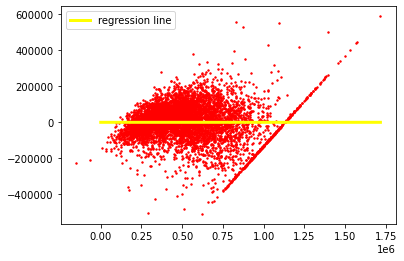

In [84]:
plt.scatter(residual_table['predictions'],residual_table['residuals'],color='red',s=2)
plt.plot(z,k,color='yellow',linewidth=3,label='regression line')
plt.legend()
plt.show()

# Verifying the assumptions of Linear Regression
### 1)Target and Independent variables have a linear Relation
### 2)from residual plot,there is constant variance of error(no Heteroscedasticity)
### 3) from the below,distribution of errors plots,we say that the distribution is normal
### 4) we've removed Multicollinearity using VIF, before applying of the model

(array([  2.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.,   1.,   1.,   0.,   1.,   0.,   2.,   0.,   1.,   0.,   0.,
          1.,   3.,   1.,   4.,   4.,   2.,   3.,   3.,   5.,   0.,   6.,
          2.,   5.,   2.,   6.,   8.,   7.,   6.,   5.,   3.,   3.,   4.,
          7.,   3.,  16.,   7.,  14.,  12.,   8.,  14.,  11.,   8.,  17.,
         15.,  22.,  13.,  28.,  15.,  17.,  22.,  19.,  23.,  35.,  28.,
         26.,  26.,  29.,  23.,  40.,  49.,  59.,  50.,  70.,  67.,  74.,
         82.,  79.,  86., 109.,  97., 126., 109., 131., 133., 147., 160.,
        160., 186., 168., 167., 184., 186., 215., 179., 180., 179., 155.,
        162., 151., 150., 161., 149., 115., 130.,  97., 104., 109., 105.,
         80.,  82.,  73.,  59.,  53.,  52.,  43.,  46.,  36.,  34.,  40.,
         29.,  31.,  15.,  24.,  18.,  19.,  12.,  18.,  10.,  10.,   5.,
          9.,   9.,   4.,   6.,   6.,   1.,   6.,   4.,   1.,   4.,   5.,
          3.,   1.,   1.,   2.,   0., 

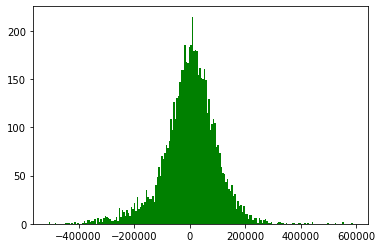

In [85]:
#Verifying the assumption of linear regression
#Distribution of errors
plt.hist(residual_table['residuals'],color='green',bins=200)

### Visualizing the coefficeints to interpret the model results

In [86]:
#Visualizing the coeffiencient of Interpret the model results.
coefficients_table = pd.DataFrame({'column': X_train.columns,
                                  'coefficients': lr.coef_})
coefficient_table = coefficients_table.sort_values(by = 'coefficients')

<BarContainer object of 28 artists>

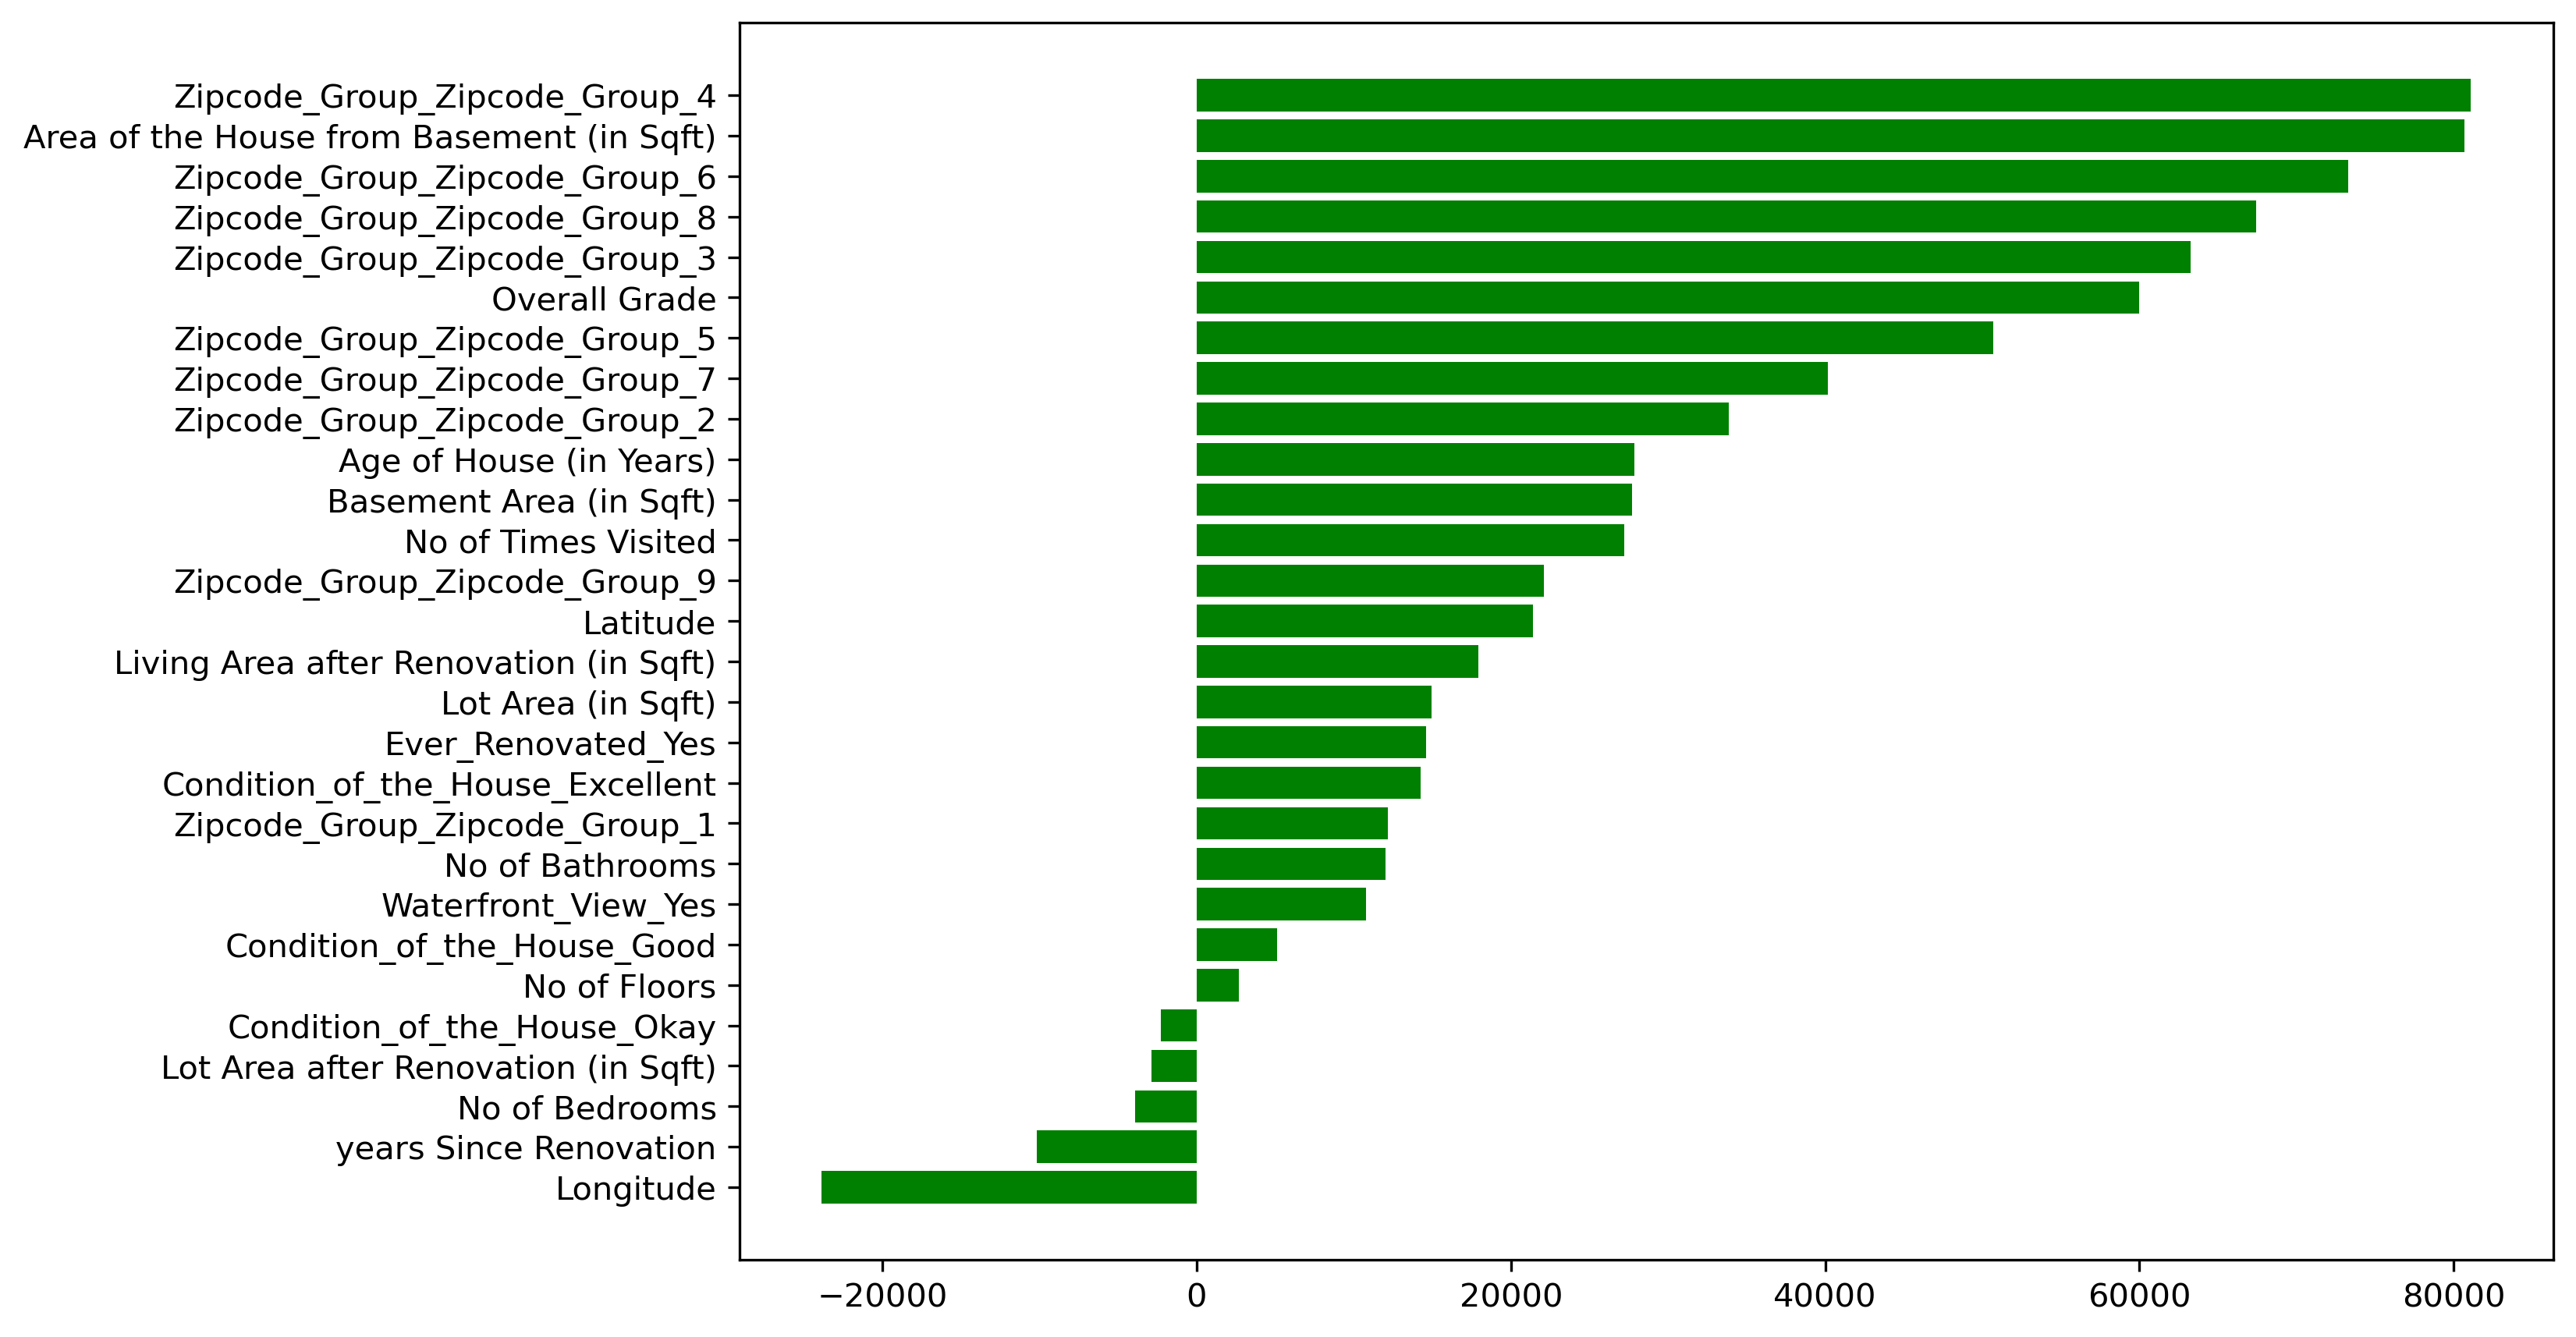

In [87]:
plt.figure(figsize=(10, 7), dpi=300)
x = coefficient_table['column']
y = coefficient_table['coefficients']
plt.barh( x, y,color='green')

# Conclusion:
#### The location plays a major role in the 'Sale_Price' of the house as per the natural intuition
#### from the above, we can say that 'Area of the House from Basement (in Sqft)' plays a major role in 'sale_price'
#### 'over all Grade' plays a significant role.
#### our models says that older houses are more expensive than the newer ones(this is new knowledge)
#### from latitude,northeast region have relatively higher prices than other prices.

# Applying other Regression Models

### RANSAC Regression

In [88]:
from sklearn import linear_model
ransac_reg = linear_model.RANSACRegressor()

In [89]:
ransac_reg.fit(X_train,Y_train)
r2_score(ransac_reg.predict(X_train),Y_train)

0.779111809022088

In [90]:
ransac_score = r2_score(ransac_reg.predict(X_test),Y_test)

In [91]:
ransac_score

0.7817070306788432

## Ridge Regressor

In [92]:
ridge_reg = linear_model.Ridge(random_state=19) 
ridge_reg.fit(X_train,Y_train)

Ridge(random_state=19)

In [93]:
r2_score(ridge_reg.predict(X_train),Y_train)

0.8112598322748077

In [94]:
ridge_score = r2_score(ridge_reg.predict(X_test),Y_test) 

In [95]:
ridge_score

0.8207017788199192

In [96]:
ridge_reg.coef_

array([ -3925.80011478,  12036.67646638,  14964.94887625,   2706.06483852,
        27221.17546824,  59969.28017547,  80674.58271911,  27724.5347515 ,
        27879.58216701,  21429.13838421, -23842.26155449,  17955.560973  ,
        -2894.71972912, -10175.80463813,  14240.068971  ,   5097.13229485,
        -2296.22959929,  10761.41906199,  14592.22318822,  12144.35844258,
        33804.24842052,  63227.96727427,  81039.47684196,  50691.90565296,
        73241.7194884 ,  40138.43558475,  67385.64507984,  22107.42729345])

In [97]:
pd.DataFrame(ridge_reg.coef_, index=X.columns, columns=['Coefficient']).sort_values(ascending=False, by = 'Coefficient')

,Coefficient
Zipcode_Group_Zipcode_Group_4,81039.476842
Area of the House from Basement (in Sqft),80674.582719
Zipcode_Group_Zipcode_Group_6,73241.719488
Zipcode_Group_Zipcode_Group_8,67385.645080
Zipcode_Group_Zipcode_Group_3,63227.967274
Overall Grade,59969.280175
Zipcode_Group_Zipcode_Group_5,50691.905653
Zipcode_Group_Zipcode_Group_7,40138.435585
Zipcode_Group_Zipcode_Group_2,33804.248421
Age of House (in Years),27879.582167


### DecisionTree Regressor

In [98]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train,Y_train)

DecisionTreeRegressor()

In [99]:
r2_score(tree_reg.predict(X_train),Y_train)

0.9987472932872901

In [100]:
# 99% seems like overfitting. Let's cross validate it.

cross_val_score(tree_reg, X_train, Y_train, cv=10)

array([0.75371007, 0.78255156, 0.74742516, 0.75870502, 0.79646301,
       0.74922789, 0.76736362, 0.78568821, 0.77595771, 0.76984778])

In [101]:
tree_score = r2_score(tree_reg.predict(X_test),Y_test) 
tree_score

0.7882307086515629

### Random Forest Regressor

In [102]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()

In [103]:
forest_reg.fit(X_train,Y_train)

RandomForestRegressor()

In [104]:
r2_score(forest_reg.predict(X_train),Y_train)

0.9823262291751552

In [105]:
# let's see how well the random forest regressor fits well with the test data
forest_score = r2_score(forest_reg.predict(X_test),Y_test)

In [106]:
forest_score

0.8786449611272196

In [107]:
data = [reg_score, ransac_score, ridge_score, tree_score, forest_score]
index = ['Linear Regression', 'Ransac Regression', 'Ridge Regression', 'Decision Tree Regressor', 'Random Forest Regressor']
pd.DataFrame(data, index=index, columns=['Scores']).sort_values(ascending = False, by=['Scores'])

,Scores
Random Forest Regressor,0.878645
Linear Regression,0.820718
Ridge Regression,0.820702
Decision Tree Regressor,0.788231
Ransac Regression,0.781707


# Random Forest Regressor gives the good scores with accuracy of 87.8% of all the Regression Models.